#### Study notes for Data loading and processing 
This is the study notes from [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html]


In [1]:
from __future__ import print_function, division
import pandas as pd
from skimage import io, transform
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import sys
import copy
print("PyTorch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)
plt.ion()


PyTorch Version:  1.0.0
Torchvision Version:  0.2.1


In [2]:
# Eable local module access
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
print("Module Path: ", module_path)


Module Path:  /data/study/torch-1.0/pytorch-study-notes


In [3]:
# Import the Sample data type instead of relying on magic strings
from core.faces.typing import Sample


In [4]:
# Top level dta directory. Here we assume the format of the directory conforms
data_dir = "./data/faces"
csv_file_name = os.path.join(data_dir, "face_landmarks.csv")
landmarks_frame=pd.read_csv(f'{data_dir}/face_landmarks.csv')
n=65
img_name = landmarks_frame.iloc[n,0]
landmarks = landmarks_frame.iloc[n,1:].values
landmarks = landmarks.astype('float').reshape(-1,2)

print(f"Image name: {img_name}")
print(f"Landmarks shape: {landmarks.shape}")
print(f"First 4 Landmarks: {landmarks[:4]}")


Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


**A helper function to show an image and its landmarks and use it to show a sample**

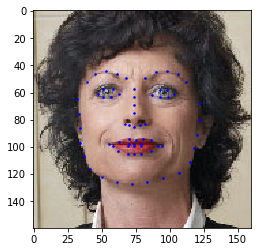

In [5]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:,1], s=10, marker='.', c='b')
    plt.pause(0.001) # wait for plots to update

plt.figure()
show_landmarks(io.imread(os.path.join(data_dir, img_name)), landmarks)
plt.show()

0 (324, 215, 3) (68, 2)


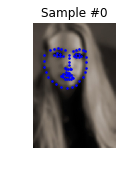

1 (500, 333, 3) (68, 2)


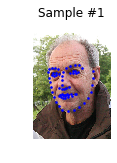

2 (250, 258, 3) (68, 2)


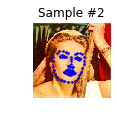

3 (434, 290, 3) (68, 2)


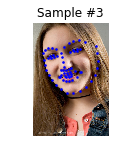

In [6]:
from core.faces.face_landmark_dataset import FaceLandmarksDataset
face_dataset = FaceLandmarksDataset(
    csv_file=csv_file_name,
    root_dir=data_dir
)
fig = plt.figure()
for i,sample in enumerate(face_dataset):
    print(i, sample.image.shape, sample.landmarks.shape)
    ax = plt.subplot(1,4, i + 1)
    plt.tight_layout()
    ax.set_title(f"Sample #{i}")
    ax.axis('off')
    show_landmarks(sample.image, sample.landmarks)
    
    if i is 3:
        plt.show()
        break

#### TRANSFORMS
One issue we have is that the samples are no tof the same size. Most neural networks   
  expect the images of a fixed size. Therefore, we will need to process the images
  * `Rescale`: to scale the image
  * `RandomCrop`: to crop from image randomly. This is data augmentation.
  * `ToTenser`: to convert the numpy images to torch images( we need to swap axes).
  
We will implment them as callable classes instead of functions so that parameters of the   
  transform need not be passed everytime it's called. We can then use a transform like this:
  
  ```python
tsfm = Transform(params)
transformed_sample = tsfm(sample)

   ```


In [7]:
from core.faces.transform_funcs import Rescale, RandomCrop, ToTensor




In [13]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([
    Rescale(256),
    RandomCrop(224)
])
fig = plt.figure()
sample = face_dataset[65]

for i, tsfrm in enumerated((scale,crop, composed)):
    transformed_sample = tsfrm(sample)
    ax = plt.subplot(1, 3, i + 1)
    plt.tight_lay
    

Initializing Datasets and Dataloaders...


In [14]:
from core.model_trainer import ModelTrainer
trainer = ModelTrainer(
    model=model_ft,
    dataloaders=data_loaders,
    optimizer=optimize_ft,
    criterion=criterion,
    number_epoches=num_epoches
)

good_model, acc_history = trainer.train()


Epoch 0/14
----------
train Loss: 0.6725 Acc: 0.5615 
val Loss: 0.3292 Acc: 0.8954 

Epoch 1/14
----------
train Loss: 0.3987 Acc: 0.8320 
val Loss: 0.2897 Acc: 0.8889 

Epoch 2/14
----------
train Loss: 0.3577 Acc: 0.8320 
val Loss: 0.2399 Acc: 0.9020 

Epoch 3/14
----------
train Loss: 0.2328 Acc: 0.8975 
val Loss: 0.2012 Acc: 0.9216 

Epoch 4/14
----------
train Loss: 0.2646 Acc: 0.8689 
val Loss: 0.2153 Acc: 0.9085 

Epoch 5/14
----------
train Loss: 0.2847 Acc: 0.8893 
val Loss: 0.2174 Acc: 0.9281 

Epoch 6/14
----------
train Loss: 0.2697 Acc: 0.8975 
val Loss: 0.2007 Acc: 0.9346 

Epoch 7/14
----------
train Loss: 0.2552 Acc: 0.9057 
val Loss: 0.1959 Acc: 0.9150 

Epoch 8/14
----------
train Loss: 0.2376 Acc: 0.8975 
val Loss: 0.1994 Acc: 0.9216 

Epoch 9/14
----------
train Loss: 0.2163 Acc: 0.8975 
val Loss: 0.2037 Acc: 0.9150 

Epoch 10/14
----------
train Loss: 0.3332 Acc: 0.8566 
val Loss: 0.1981 Acc: 0.9281 

Epoch 11/14
----------
train Loss: 0.2220 Acc: 0.9057 
val Loss:

### COMPARISON WITH MODEL TRAINED FROM SCRATCH

Just for fun, lets see how the model learns if we do not use transfer   
  learning. The performance of fine-tuning vs. feature extracting depends  
  largely on the dataset but in general both transfer learning methods  
  produce favorable result in terms of traing time and overall accuracy 
  versus a model trained from scratch

Epoch 0/14
----------
train Loss: 0.6932 Acc: 0.5287 
val Loss: 0.6844 Acc: 0.5948 

Epoch 1/14
----------
train Loss: 0.6666 Acc: 0.6434 
val Loss: 0.7208 Acc: 0.5817 

Epoch 2/14
----------
train Loss: 0.6306 Acc: 0.6434 
val Loss: 0.7510 Acc: 0.5817 

Epoch 3/14
----------
train Loss: 0.6402 Acc: 0.6311 
val Loss: 0.6944 Acc: 0.6471 

Epoch 4/14
----------
train Loss: 0.6433 Acc: 0.6148 
val Loss: 0.6675 Acc: 0.6536 

Epoch 5/14
----------
train Loss: 0.6129 Acc: 0.6475 
val Loss: 0.7120 Acc: 0.6601 

Epoch 6/14
----------
train Loss: 0.6261 Acc: 0.6721 
val Loss: 0.6647 Acc: 0.6340 

Epoch 7/14
----------
train Loss: 0.5809 Acc: 0.6557 
val Loss: 0.6173 Acc: 0.6863 

Epoch 8/14
----------
train Loss: 0.5551 Acc: 0.6926 
val Loss: 0.6140 Acc: 0.7059 

Epoch 9/14
----------
train Loss: 0.5792 Acc: 0.6803 
val Loss: 0.7882 Acc: 0.6732 

Epoch 10/14
----------
train Loss: 0.6208 Acc: 0.6721 
val Loss: 0.7453 Acc: 0.6078 

Epoch 11/14
----------
train Loss: 0.5454 Acc: 0.7336 
val Loss:

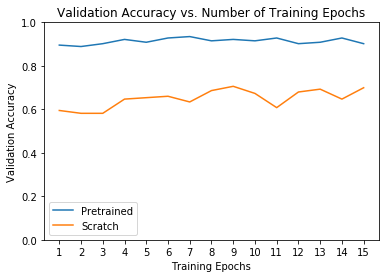

In [15]:
scratch_img_model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    feature_extract=False,
    use_pretrained=False,
    device = device,
)
scratch_model_ft = scratch_img_model.model_ft
scratch_optimizer = optim.SGD(
    scratch_model_ft.parameters(), 
    lr=0.001, 
    momentum=0.9
)
scratch_criterion=nn.CrossEntropyLoss()
scratch_trainer = ModelTrainer(
    model=scratch_model_ft,
    dataloaders=data_loaders,
    criterion=scratch_criterion,
    optimizer=scratch_optimizer,
    number_epoches=num_epoches

)
good_scratch_model, scratch_acc_history = scratch_trainer.train()

ohist = []
shist = []

ohist = [h.cpu().numpy() for h in acc_history]
shist = [h.cpu().numpy() for h in scratch_acc_history]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epoches+1),ohist,label="Pretrained")
plt.plot(range(1,num_epoches+1),shist,label="Scratch")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epoches+1, 1.0))
plt.legend()
plt.show()